In [1]:
import pathlib
project_path = pathlib.Path().resolve().parent.parent
paths = []

import sys
path = project_path.joinpath("benchmark/third_party/bench-mr/python").as_posix()
if path not in sys.path:
    sys.path.append(path)

import os
os.environ["MPB_BINARY"] = "./benchmark"
# os.environ["MPB_PYTHON_BINARY"] = project_path.joinpath("scripts/run_bench_mr.py").as_posix()
os.environ["MPB_PYTHON_BINARY"] = "/home/mikhail/research/pytorch-motion-planner/scripts/run_bench_mr.py"
os.environ["MPB_BINARY_DIR"] = project_path.joinpath("benchmark/third_party/bench-mr/bin").as_posix()
os.environ["PYTHONPATH"] = "../../../../build/benchmark:" + project_path.as_posix()


import matplotlib as mpl
mpl.rcParams['mathtext.fontset'] = 'cm'
# make sure to not use Level-3 fonts
mpl.rcParams['pdf.fonttype'] = 42

from plot_env import plot_env
import json
from plot_env import plot_env, plot_env_options
from plot_trajectory import plot_trajectory, plot_nodes, plot_trajectory_options
from color import get_color, get_colors
import matplotlib.pyplot as plt
from mpb import MPB, MultipleMPB
from plot_stats import plot_planner_stats
import numpy as np
import matplotlib.pyplot as plt

%config InlineBackend.figure_format='retina'

# Run one experiment

In [2]:
# scenario = (
#     {"theta": -1.58, "x": 7.5, "y": -10},
#     {"theta": -1.58, "x": 116, "y": -70},
#     "warehouse2",
#     "polygon_mazes/warehouse_robot.svg",
# )
scenario = (
    {"theta": 0, "x": 2, "y": -7.27},
    {"theta": -1.58, "x": 9, "y": -11.72},
    "parking1",
    "polygon_mazes/car.svg",
)
m = MPB()
m["env.start"] = scenario[0]
m["env.goal"] = scenario[1]
m["env.type"] = "polygon"
m["env.polygon.source"] = "polygon_mazes/%s.svg" % scenario[2]
m["env.collision.robot_shape_source"] = scenario[3]

m["max_planning_time"] = 60
m["benchmark.planning"]['constrained_onf_planner'] = True
m["steer.car_turning_radius"] = 2
m["sbpl.scaling"] = 1
# m.set_planners(['constrained_onf_planner', 'bfmt', 'cforest', 'prm', 'prm_star', 'informed_rrt_star', 'sbpl_mha'])
m.set_planners(['constrained_onf_planner', 'informed_rrt_star', 'sbpl_mha'])
# m.set_planners(['constrained_onf_planner'])
m.run(id=scenario[2], runs=1)

Running MPB with ID parking1 (log file at parking1.log)...


parking1:   0%|          | 0/3 [00:00<?, ?it/s]

0

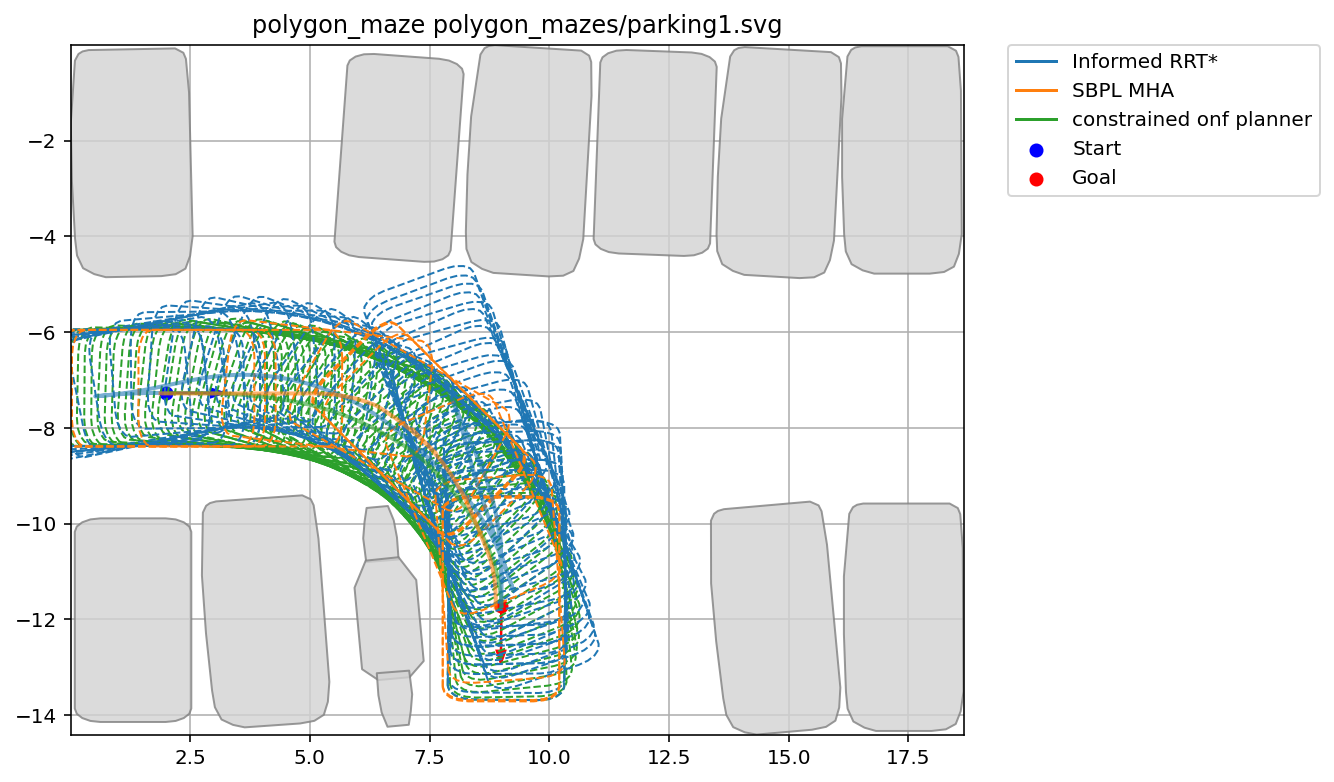

In [3]:
m.visualize_trajectories(draw_start_goal_thetas=True,
                         plot_every_nth_polygon=8,
                         fig_width=8,
                         fig_height=8,
                         silence=True,
                         save_file="plots/corridor_experiment.pdf",
                         num_colors=10)

Visualizing parking1_results.json...


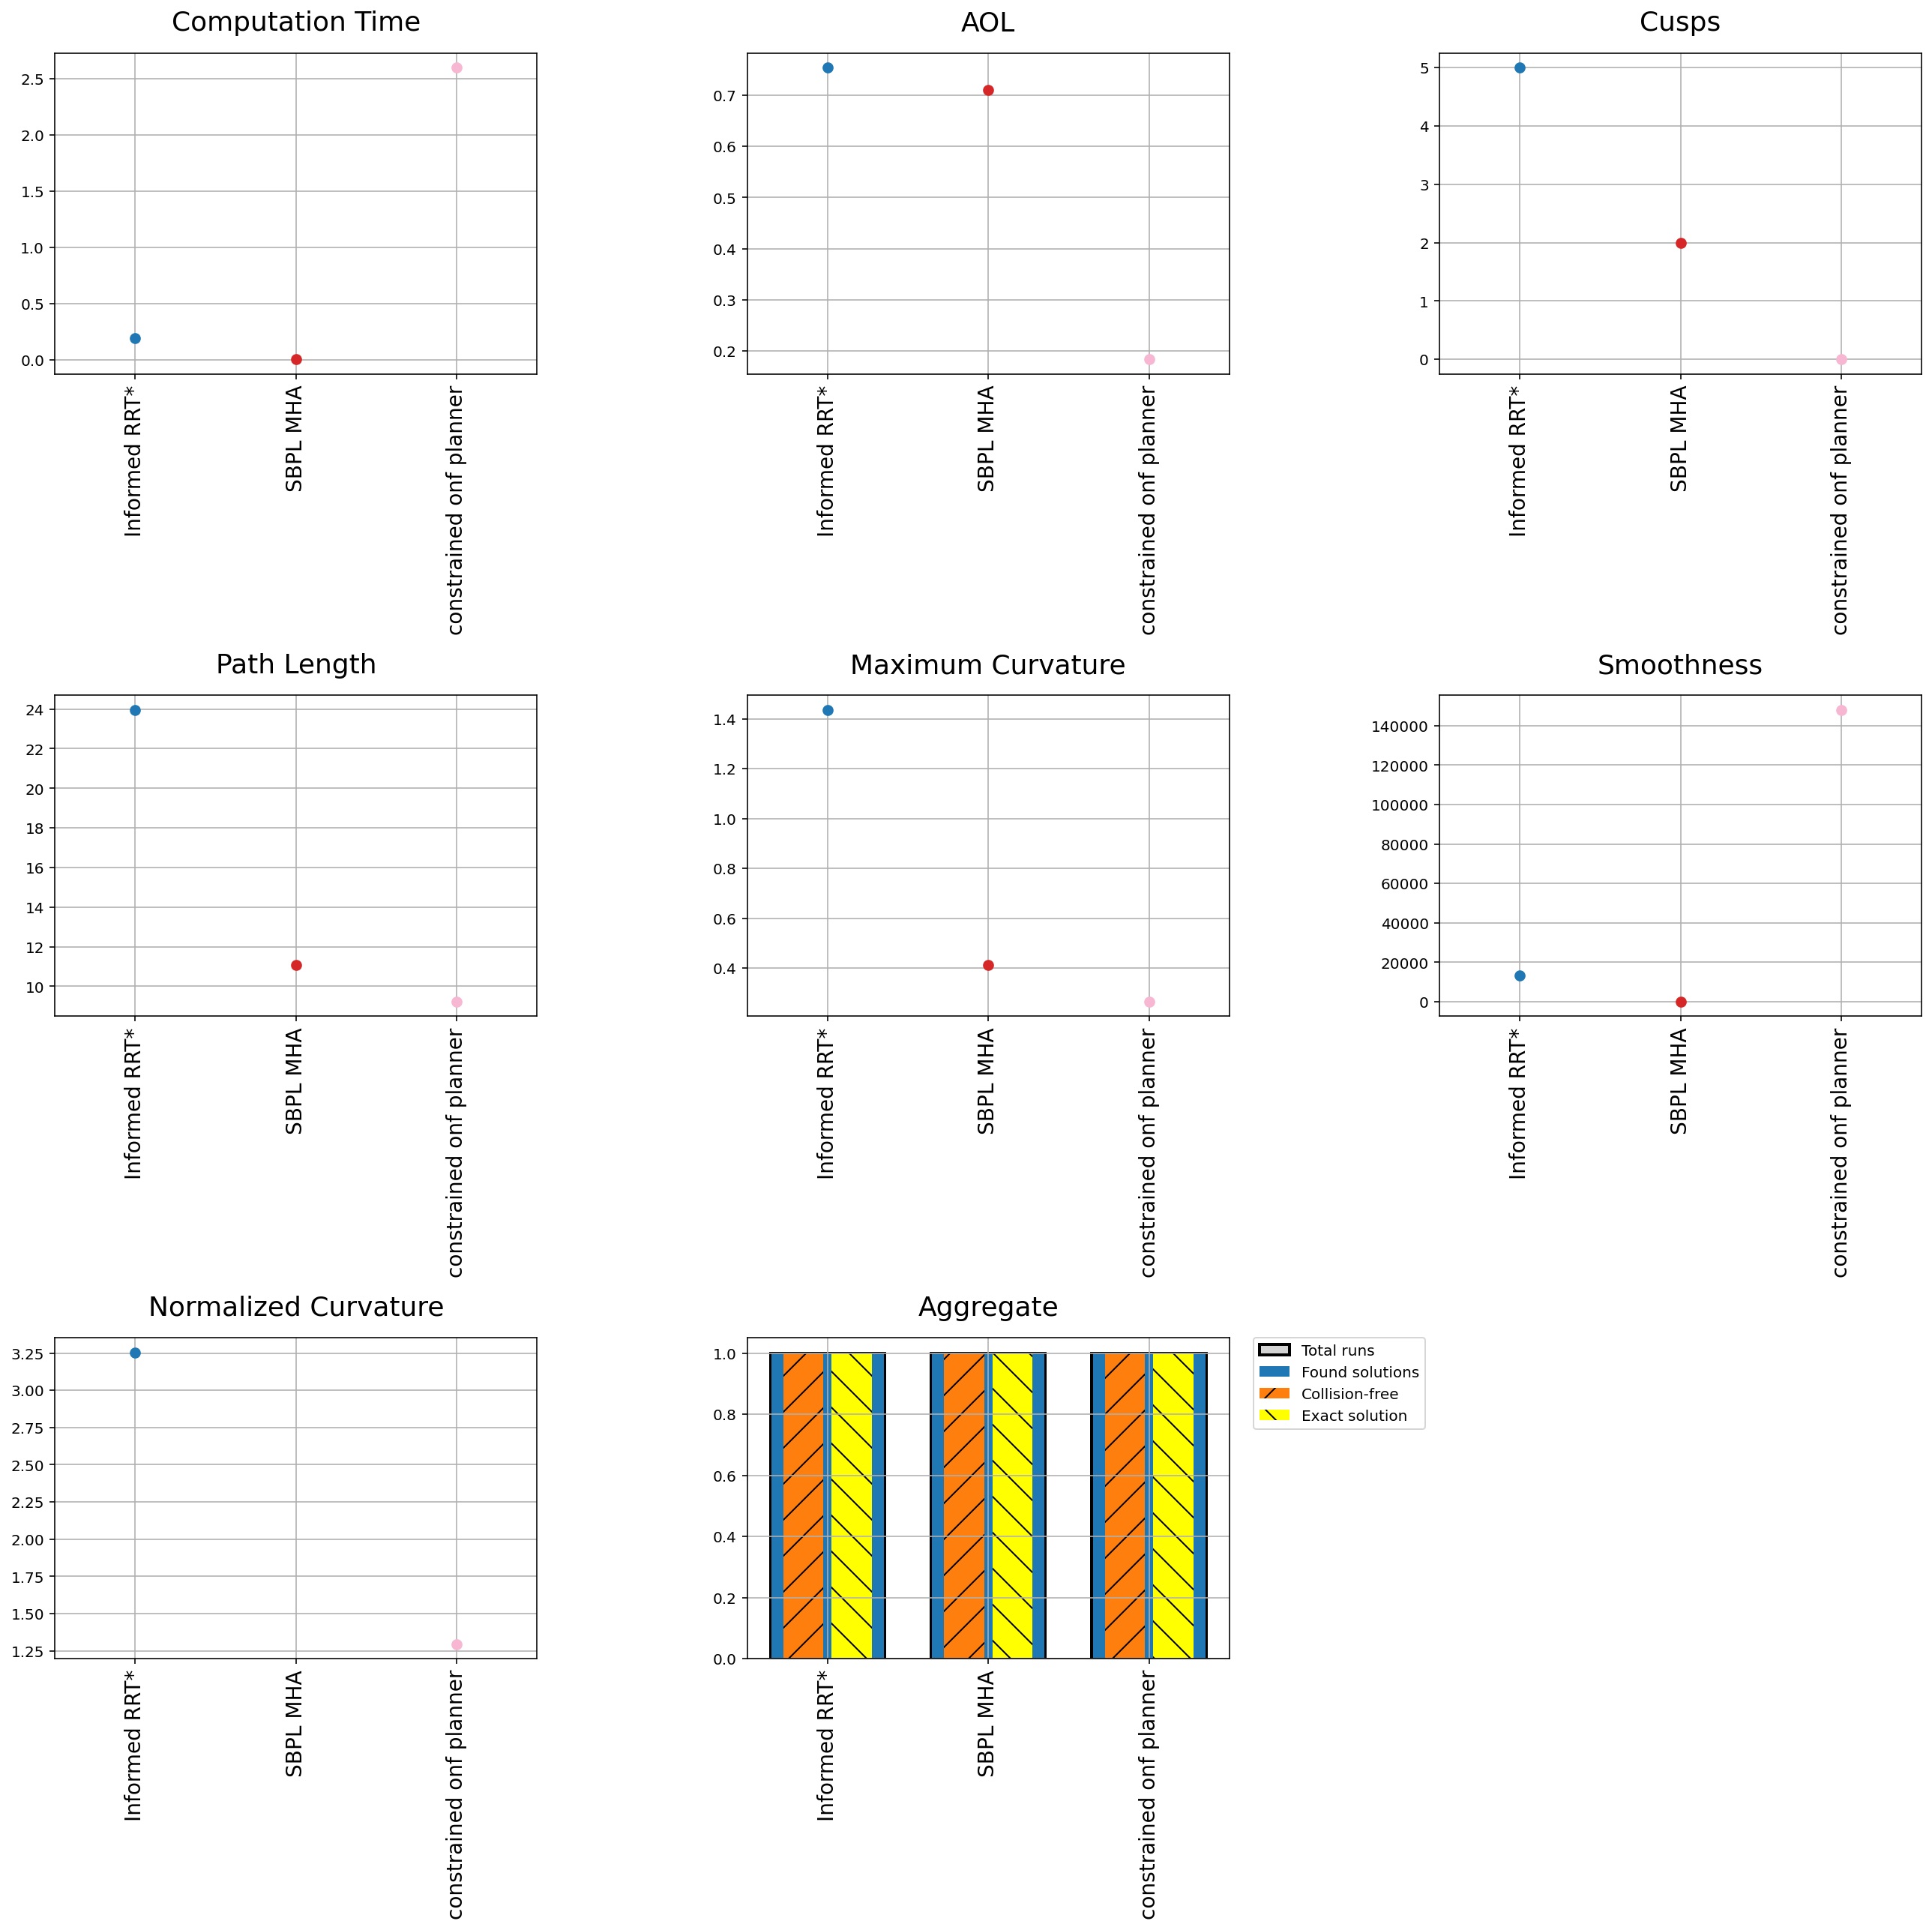

In [4]:
m.plot_planner_stats(metrics="planning_time, aol, cusps, path_length, max_curvature, smoothness, normalized_curvature, aggregate")

# Run multiple exepirements

In [11]:
scenarios = [
    (
        "parking1", [
            ({"theta": 0, "x": 0, "y": -2.27}, {"theta": -1.58, "x": 7.72, "y": -7.72}),
            ({"theta": -1.58, "x": 7.72, "y": -7.72}, {"theta": 3.14, "x": 0, "y": -2.27}),
#             ({"theta": -1.58, "x": 7.72, "y": -7.72}, {"theta": 1.58, "x": 10, "y": -7.72}),
            ({"theta": -1.58, "x": 7.72, "y": -7.72}, {"theta": 0, "x": 15, "y": -2.27}),
            ({"theta": 3.14, "x": 15, "y": -2.27}, {"theta": -1.58, "x": 7.72, "y": -7.72}),
        ]
    ), (
        "parking2", [
            ({"theta": 0, "x": 0, "y": -2.27}, {"theta": 1.57, "x": 10.91, "y": 2.73}),
            ({"theta": 1.57, "x": 10.91, "y": 2.73}, {"theta": 3.14, "x": 0, "y": -2.27}),
            ({"theta": 0, "x": 0, "y": -2.27}, {"theta": 1.57, "x": 13.5, "y": -7}),
            ({"theta": 1.57, "x": 13.5, "y": -7}, {"theta": 3.14, "x": 0, "y": -2.27}),
            ({"theta": 1.57, "x": 13.5, "y": -7}, {"theta": 1.57, "x": 10.91, "y": 2.73}),
        ]
    ), (
        "parking3", [
            ({"theta": 0, "x": 15.45, "y": -2.27}, {"theta": 0, "x": 3.4, "y": 0.34}),
            ({"theta": 0, "x": 5, "y": -2.27}, {"theta": 0, "x": 19.5, "y": -6}),
            ({"theta": 3.14, "x": 19.5, "y": -6}, {"theta": 3.14, "x": 5, "y": -2.27}),
            ({"theta": 3.14, "x": 19.5, "y": -2.5}, {"theta": 3.14, "x": 4.5, "y": 0.5}),
            ({"theta": 0, "x": 4.5, "y": 0.5}, {"theta": 0, "x": 19.5, "y": -2.5}),
        ]
#     ), (
#         "warehouse", [
#             ({"theta": -1.58, "x": -2.5, "y": 4.55}, {"theta": -1.58, "x": 65, "y": 2.5}, "polygon_mazes/warehouse_robot.svg"),
#             ({"theta": 0, "x": -2.5, "y": -55}, {"theta": 0, "x": 55, "y": 5.5}, "polygon_mazes/warehouse_robot.svg"),
#             ({"theta": 1.58, "x": 14.5, "y": -28}, {"theta": 1.58, "x": 48, "y": -28}, "polygon_mazes/warehouse_robot.svg"),
#             ({"theta": 3.14, "x": 65, "y": -55}, {"theta": 1.58, "x": 14.5, "y": 0}, "polygon_mazes/warehouse_robot.svg"),
#             ({"theta": 3.14, "x": 3, "y": -5}, {"theta": 1.58, "x": 66, "y": -5}, "polygon_mazes/warehouse_robot.svg"),
#         ]
#     ), (
#         "warehouse2", [
#             ({"theta": -1.58, "x": 7.5, "y": -10}, {"theta": -1.58, "x": 116, "y": -70}, "polygon_mazes/warehouse_robot.svg")
#         ]
    )
    
]

In [12]:
def scenarios_generator(scenarios):
    for scenario_set in scenarios:
        for run in scenario_set[1]:
            if len(run) > 2:
                yield (run[0], run[1], scenario_set[0], run[2])
            else:
                yield (run[0], run[1], scenario_set[0], "polygon_mazes/car.svg")

In [13]:
deltas = {
    "parking1": {
        "x": 1.28,
        "y": -4.5
    },
    "warehouse": {
        "x": 10.5,
        "y": -12.6
    },
    "parking2": {
        "x": 1.28,
        "y": -4.5
    },
    "parking3": {
        "x": 9,
        "y": -9.5
    },
}

Available memory: 13.02 GB, limiting each MPB process to 41.7% usage (5.42 GB).
Creating pool of 1 processes.
Running MPB with ID polygons_0 (log file at polygons/polygons_0.log)...


polygons_0:   0%|          | 0/3 [00:00<?, ?it/s]

Benchmark 0 (polygons_0) finished successfully.
Running MPB with ID polygons_1 (log file at polygons/polygons_1.log)...


polygons_1:   0%|          | 0/3 [00:00<?, ?it/s]

Benchmark 1 (polygons_1) finished successfully.
Running MPB with ID polygons_2 (log file at polygons/polygons_2.log)...


polygons_2:   0%|          | 0/3 [00:00<?, ?it/s]

Benchmark 2 (polygons_2) finished successfully.
Running MPB with ID polygons_3 (log file at polygons/polygons_3.log)...


polygons_3:   0%|          | 0/3 [00:00<?, ?it/s]

Benchmark 3 (polygons_3) finished successfully.
Running MPB with ID polygons_4 (log file at polygons/polygons_4.log)...


polygons_4:   0%|          | 0/3 [00:00<?, ?it/s]

Benchmark 4 (polygons_4) finished successfully.
Running MPB with ID polygons_5 (log file at polygons/polygons_5.log)...


polygons_5:   0%|          | 0/3 [00:00<?, ?it/s]

Benchmark 5 (polygons_5) finished successfully.
Running MPB with ID polygons_6 (log file at polygons/polygons_6.log)...


polygons_6:   0%|          | 0/3 [00:00<?, ?it/s]

Benchmark 6 (polygons_6) finished successfully.
Running MPB with ID polygons_7 (log file at polygons/polygons_7.log)...


polygons_7:   0%|          | 0/3 [00:00<?, ?it/s]

Benchmark 7 (polygons_7) finished successfully.
Running MPB with ID polygons_8 (log file at polygons/polygons_8.log)...


polygons_8:   0%|          | 0/3 [00:00<?, ?it/s]

Benchmark 8 (polygons_8) finished successfully.
Running MPB with ID polygons_9 (log file at polygons/polygons_9.log)...


polygons_9:   0%|          | 0/3 [00:00<?, ?it/s]

Benchmark 9 (polygons_9) finished successfully.
Running MPB with ID polygons_10 (log file at polygons/polygons_10.log)...


polygons_10:   0%|          | 0/3 [00:00<?, ?it/s]

Benchmark 10 (polygons_10) finished successfully.
Running MPB with ID polygons_11 (log file at polygons/polygons_11.log)...


polygons_11:   0%|          | 0/3 [00:00<?, ?it/s]

Benchmark 11 (polygons_11) finished successfully.
Running MPB with ID polygons_12 (log file at polygons/polygons_12.log)...


polygons_12:   0%|          | 0/3 [00:00<?, ?it/s]

Benchmark 12 (polygons_12) finished successfully.
Running MPB with ID polygons_13 (log file at polygons/polygons_13.log)...


polygons_13:   0%|          | 0/3 [00:00<?, ?it/s]

Benchmark 13 (polygons_13) finished successfully.
All benchmarks succeeded.


True

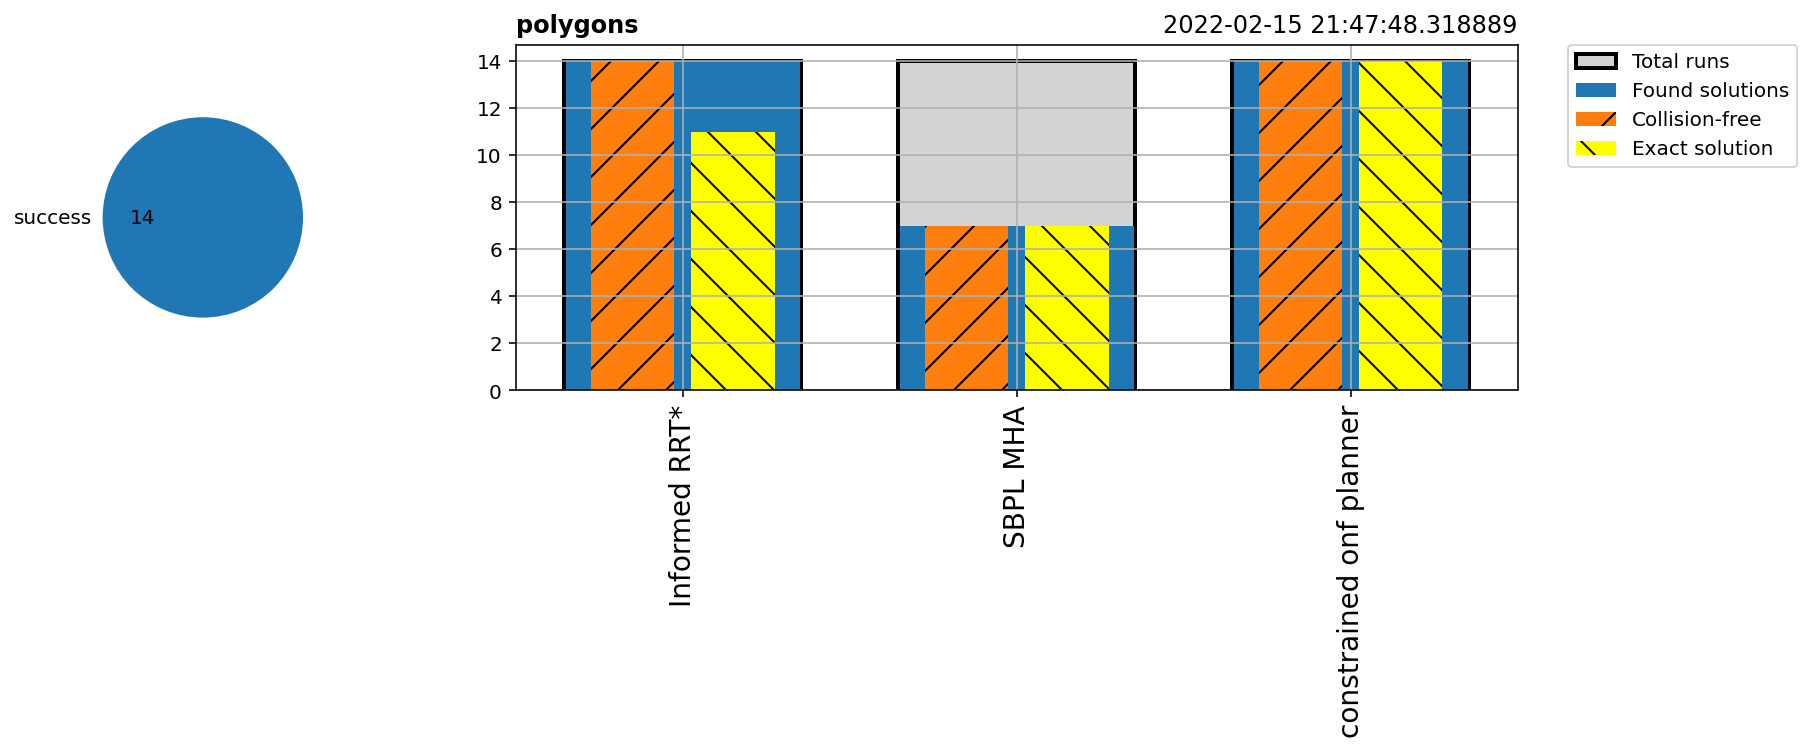

In [14]:
# env = os.environ
# env["MPLBACKEND"] = "TkAgg"
pool = MultipleMPB()
for scenario in scenarios_generator(scenarios):
    m = MPB()
    m["env.start"] = scenario[0].copy()
    m["env.start"]["x"] += deltas[scenario[2]]["x"]
    m["env.start"]["y"] += deltas[scenario[2]]["y"]
    m["env.goal"] = scenario[1].copy()
    m["env.goal"]["x"] += deltas[scenario[2]]["x"]
    m["env.goal"]["y"] += deltas[scenario[2]]["y"]
    m["env.type"] = "polygon"
    m["env.polygon.source"] = "polygon_mazes/%s.svg" % scenario[2]
    m["env.collision.robot_shape_source"] = scenario[3]

    m["max_planning_time"] = 20
    m["benchmark.planning"]['constrained_onf_planner'] = True
    m["steer.car_turning_radius"] = 2
    m["sbpl.scaling"] = 1
#     m.set_planners(['constrained_onf_planner', 'informed_rrt_star', 'sbpl_mha', 'bfmt'])
    m.set_planners(['constrained_onf_planner', 'informed_rrt_star', 'sbpl_mha'])
#     m.set_planners(["sbpl_mha"])
#     m.set_planners(['sbpl_mha'])
#     m.set_planners(['constrained_onf_planner'])
#     m.set_planners(['informed_rrt_star'])
    pool.benchmarks.append(m)

pool.run_parallel(id="polygons", runs=1, processes=1)

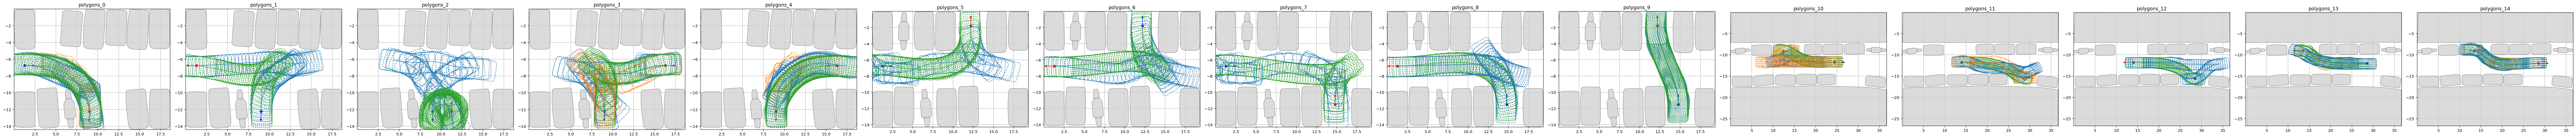

In [9]:
pool.visualize_trajectories(draw_start_goal_thetas=True,
                         plot_every_nth_polygon=8,
                         fig_width=8,
                         fig_height=8,
                         silence=True,
                         save_file="plots/polygon_experiment_pool.pdf",
                         num_colors=10)

Successfully merged [polygons/polygons_0_results.json, polygons/polygons_1_results.json, polygons/polygons_2_results.json, polygons/polygons_3_results.json, polygons/polygons_4_results.json, polygons/polygons_5_results.json, polygons/polygons_6_results.json, polygons/polygons_7_results.json, polygons/polygons_8_results.json, polygons/polygons_9_results.json, polygons/polygons_10_results.json, polygons/polygons_11_results.json, polygons/polygons_12_results.json, polygons/polygons_13_results.json] into corridors_result.json.
Visualizing corridors_result.json...


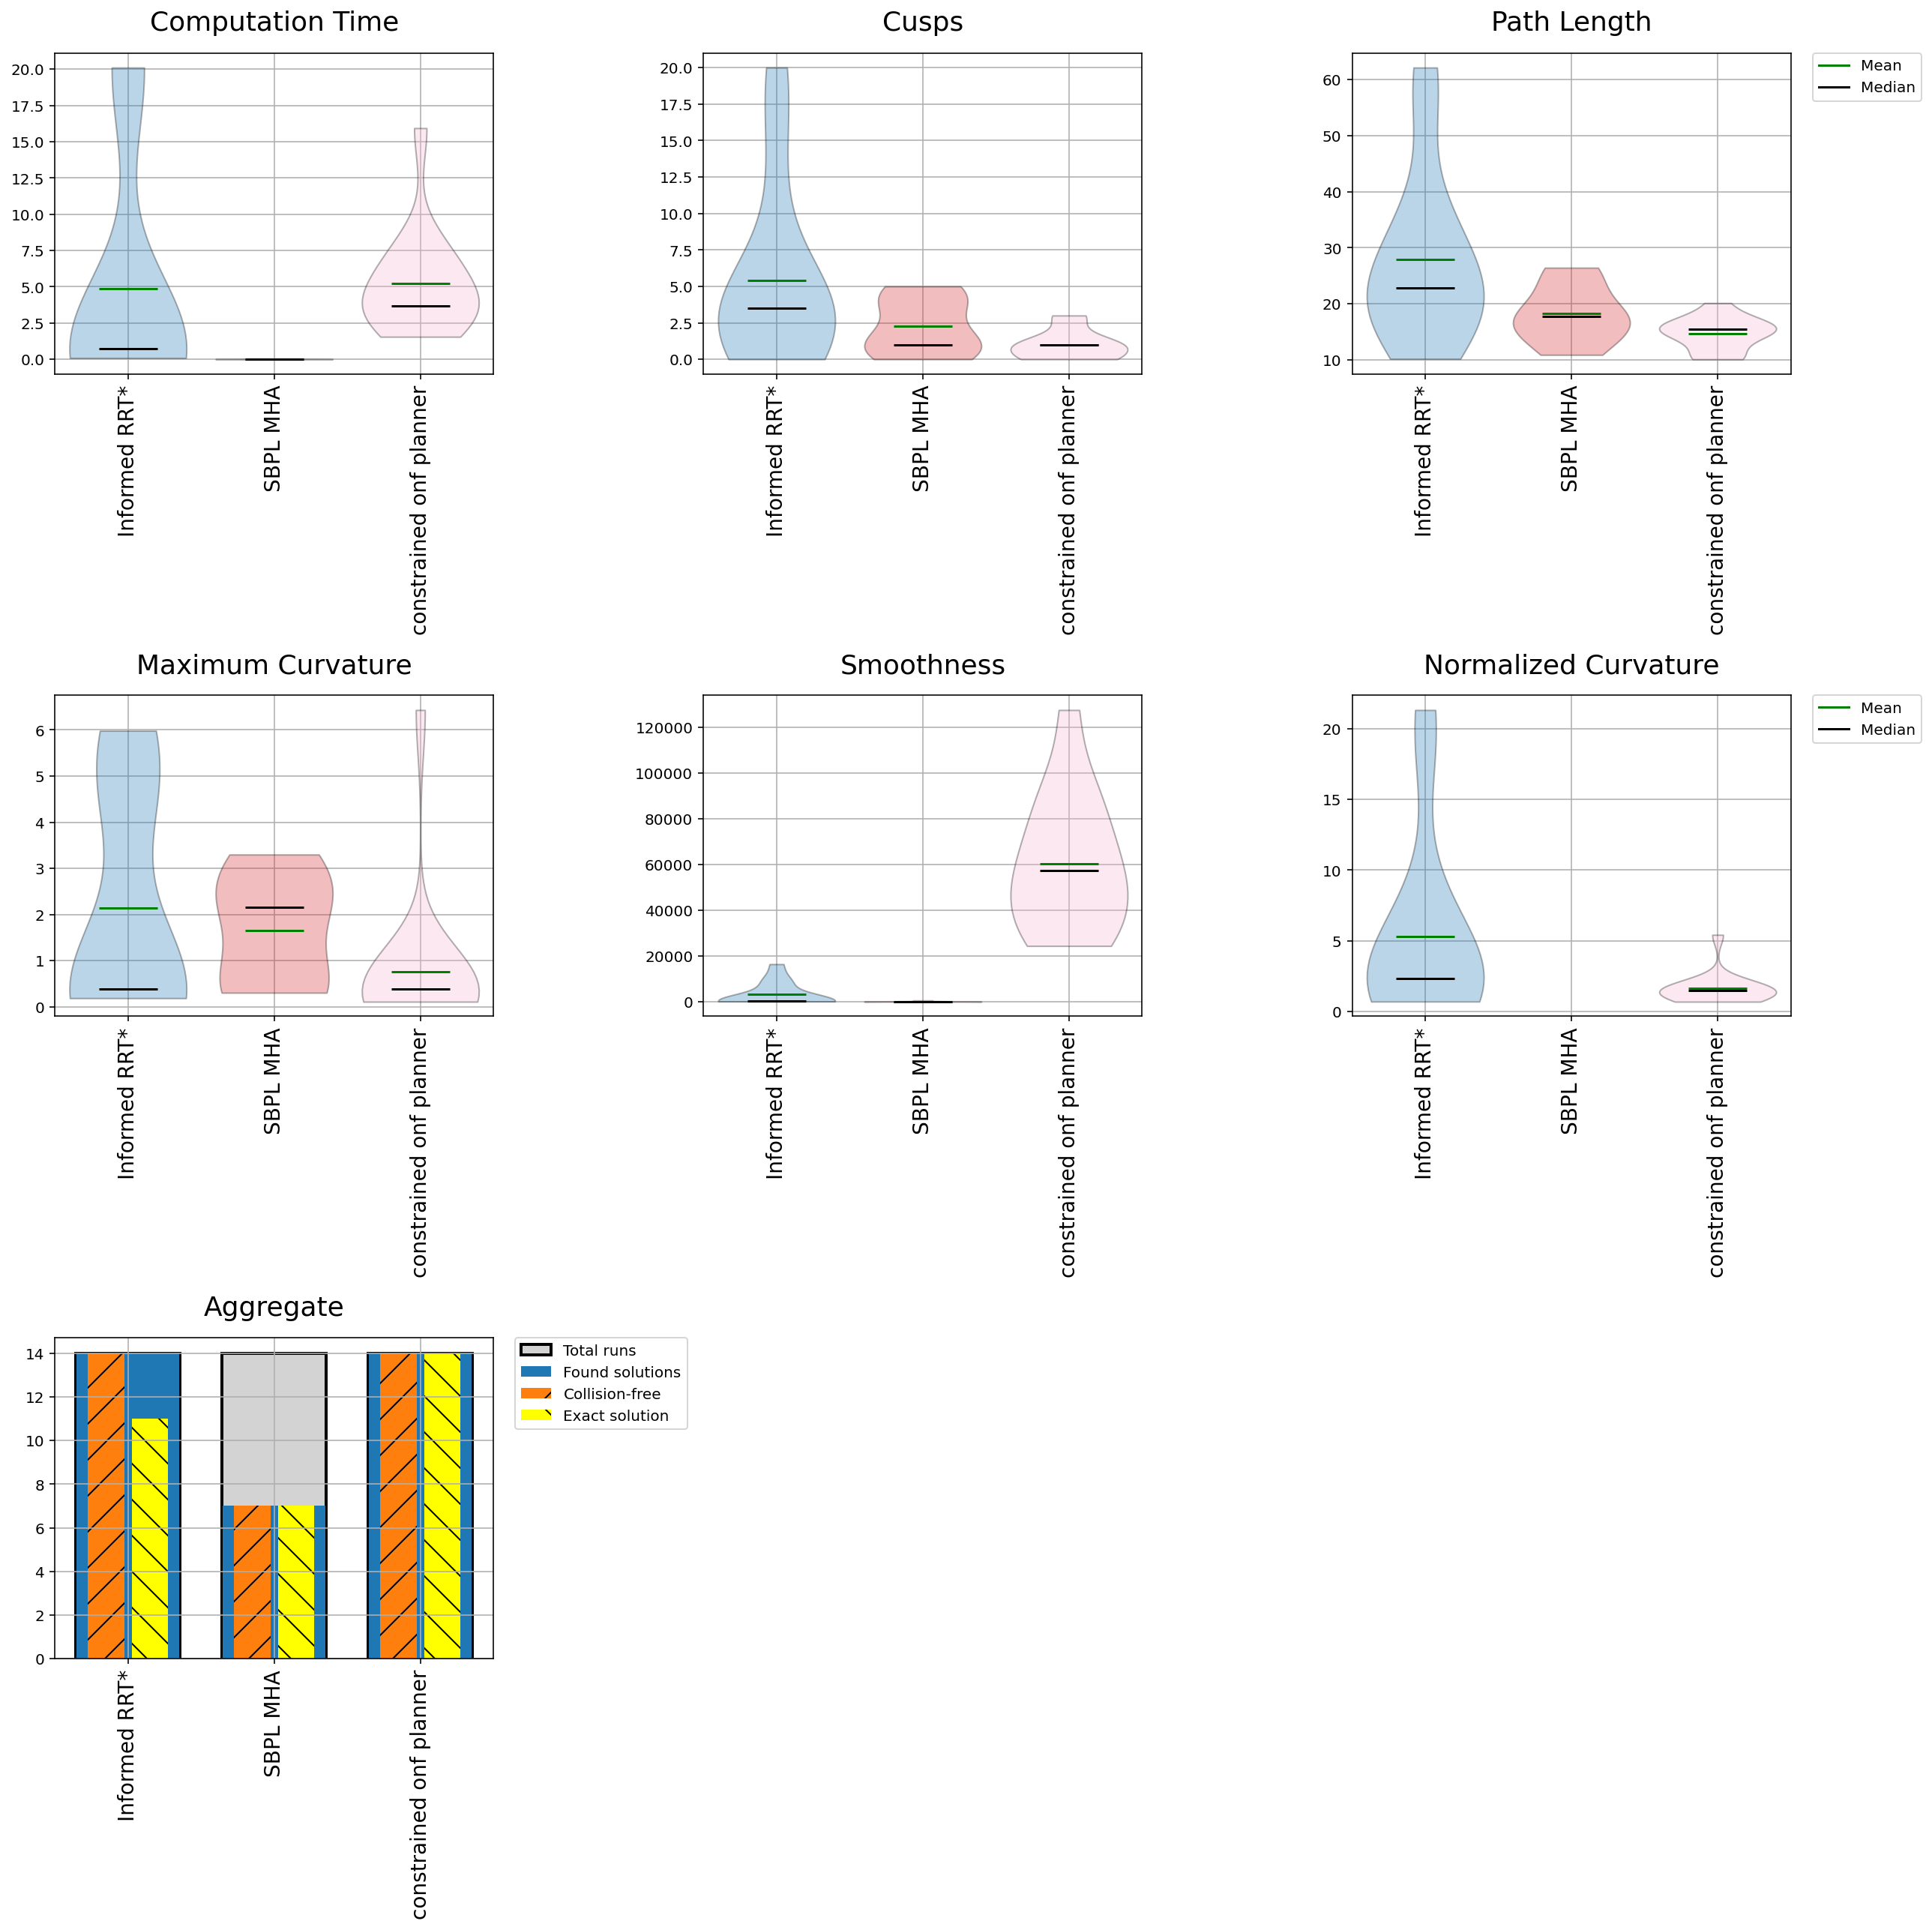

In [15]:
result = "corridors_result.json"
pool.merge(result, make_separate_runs=True)
plot_planner_stats(result, metrics="planning_time, cusps, path_length, max_curvature, smoothness, normalized_curvature, aggregate")